# Coding Exercises (Part 15)

## Financial Portfolios

### Exercise 15 : Creating, analyzing and optimizing Portfolios 

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

Import the us stocks dataset (__us_stocks.csv__) and select the 5-Year period from __31-12-2013__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__ and work through the next questions with this DataFrame!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
stocks=pd.read_csv("us_stocks.csv",header=[0,1],index_col=0,parse_dates=True).loc[:,"Close"]["31-12-2013":"1-1-2019"]
stocks.tail()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2018-12-21,91.330002,124.949997,44.840000,174.149994,90.970001,87.129997
2018-12-24,89.500000,124.059998,43.590000,170.279999,87.360001,85.820000
2018-12-26,93.839996,134.179993,46.189999,174.029999,90.089996,90.410004
2018-12-27,94.680000,134.520004,46.360001,175.710007,92.019997,91.589996
2018-12-28,94.419998,133.199997,46.750000,175.559998,91.180000,92.129997


Create __10,000 random portfolios__ where weights of constituents __sum up to 1__ (all weights must be __between 0 and 1__). Use __np.random.seed(123)__!

In [16]:
# count=1
# weights=[]
# while count<=1000:
#     wt=np.random.random_sample(6)
#     weights.append(wt)
#     count+=1
np.random.seed(123)
weights=np.random.random(stocks.shape[1]*1000).reshape(1000,stocks.shape[1])
weights=pd.DataFrame(weights)
weights.columns=stocks.columns
row_sum=weights.sum(axis=1)
# weights["sums"]=row_sum
# weights/weights.iloc[:,-1]
weights=weights.divide(row_sum,axis=0)
# weights=weights.iloc[:,:-1]
weights

,AXP,FB,INTC,MCD,PG,WMT
0,0.239885,0.098555,0.078134,0.189889,0.247806,0.145730
1,0.271614,0.189658,0.133190,0.108594,0.095040,0.201904
2,0.220141,0.029955,0.199798,0.370436,0.091602,0.088068
3,0.136903,0.136974,0.163392,0.218774,0.186586,0.157371
4,0.282189,0.126149,0.141316,0.089160,0.114726,0.246461
...,...,...,...,...,...,...
995,0.159481,0.007873,0.241659,0.004052,0.292326,0.294609
996,0.014295,0.034012,0.238237,0.152141,0.276551,0.284764
997,0.015918,0.129600,0.394941,0.116138,0.027961,0.315443
998,0.035599,0.210482,0.194003,0.177664,0.194757,0.187496


Calculate __annualized risk and return__ for the __six stocks__ and for the 10,000 __random portfolios__! Calculation shall be based on __daily__ returns (__simple__ returns). __Visualize__! (Use the user-defined function ann_risk_return)

In [17]:
daily_return_stocks=stocks.pct_change()
daily_return_stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.014108,0.001098,-0.006548,-0.006390,-0.010687,0.002796
2014-01-03,0.003242,-0.002742,-0.000388,0.001348,-0.001118,-0.003295
2014-01-06,-0.000446,0.048387,-0.012413,-0.007147,0.002362,-0.005594
2014-01-07,-0.003790,0.012587,0.005106,0.005529,0.009673,0.003069


In [18]:
weights.head()

,AXP,FB,INTC,MCD,PG,WMT
0,0.239885,0.098555,0.078134,0.189889,0.247806,0.145730
1,0.271614,0.189658,0.133190,0.108594,0.095040,0.201904
2,0.220141,0.029955,0.199798,0.370436,0.091602,0.088068
3,0.136903,0.136974,0.163392,0.218774,0.186586,0.157371
4,0.282189,0.126149,0.141316,0.089160,0.114726,0.246461


In [21]:
daily_return_port=daily_return_stocks.mul(weights.iloc[0]).dropna().sum(axis=1).to_frame()
daily_return_port.head()

,0
Date,
2014-01-02,-0.007242
2014-01-03,-0.000024
2014-01-06,0.002105
2014-01-07,0.004624
2014-01-08,-0.006481


In [129]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [131]:
daily_return_port.head()

,0
Date,
2014-01-02,-0.006491
2014-01-03,-0.000262
2014-01-06,0.009373
2014-01-07,0.005999
2014-01-08,-0.003812


In [132]:
port_return_risk=ann_risk_return(daily_return_port)
port_return_risk

,Return,Risk
0,0.11791,0.15091


In [25]:
weights.shape[0]

1000

In [26]:
df_ls=[]

In [27]:
for i in range(0,weights.shape[0]):
    daily_return_port=daily_return_stocks.mul(weights.iloc[i]).dropna().sum(axis=1).to_frame()
    port_return_risk=ann_risk_return(daily_return_port)
    df_ls.append(port_return_risk)
return_risk=pd.concat(df_ls)   
return_risk.index=range(0,return_risk.shape[0])
return_risk

,Return,Risk
0,0.081607,0.125412
1,0.097977,0.141345
2,0.099470,0.131930
3,0.102159,0.130194
4,0.085636,0.136907
...,...,...
995,0.067636,0.135325
996,0.087282,0.131569
997,0.120326,0.157043
998,0.116502,0.138923


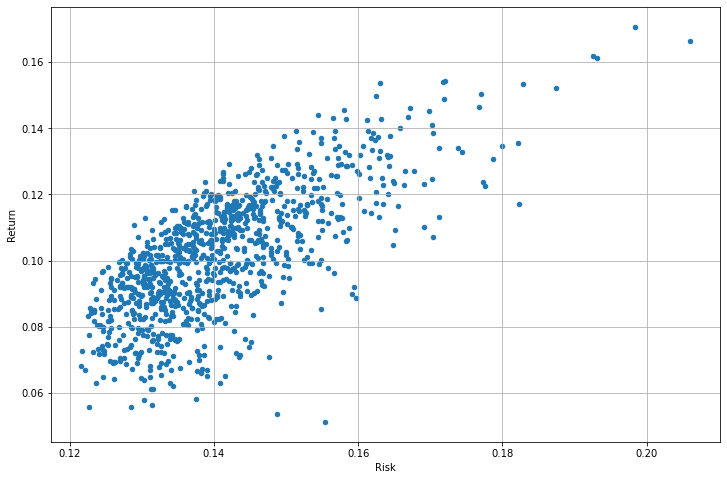

In [28]:
return_risk.plot(kind="scatter",y="Return",x="Risk",figsize=(12,8),grid=True)
plt.show()

Assume that the approximate __risk-free asset__ showed a return of __1.7%__ p.a. (5-Year US Treasury Note). __Calculate__ the __Sharpe Ratio__ for the __six stocks__ and for the 10,000 __random portfolios__! __Visualize__ again (Sharpe Ratio as "Third Dimension")!

In [29]:
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,90.730003,54.650002,25.959999,97.029999,81.410004,78.690002
2014-01-02,89.449997,54.709999,25.790001,96.410004,80.540001,78.910004
2014-01-03,89.739998,54.560001,25.780001,96.540001,80.449997,78.650002
2014-01-06,89.699997,57.200001,25.459999,95.849998,80.639999,78.209999
2014-01-07,89.360001,57.919998,25.590000,96.379997,81.419998,78.449997


In [63]:
rf=0.017
def get_sr(risk,rt):
    return (rt-rf)/risk

In [98]:
sr_stocks=ann_risk_return(daily_return_stocks)
sr_stocks.head()

,Return,Risk
AXP,0.029475,0.206778
FB,0.223580,0.299131
INTC,0.148437,0.247231
MCD,0.132492,0.165322
PG,0.033851,0.149389


In [133]:
sr_stocks["SharpRatio"]=get_sr(sr_stocks["Risk"], sr_stocks["Return"])

AXP     0.060328
FB      0.690599
INTC    0.531639
MCD     0.698585
PG      0.112800
WMT     0.172221
dtype: float64

In [105]:
sr_stocks

,Return,Risk,SharpRatio
AXP,0.029475,0.206778,0.060328
FB,0.223580,0.299131,0.690599
INTC,0.148437,0.247231,0.531639
MCD,0.132492,0.165322,0.698585
PG,0.033851,0.149389,0.112800
WMT,0.050479,0.194394,0.172221


In [107]:
return_risk["SharpRatio"]=get_sr(return_risk["Risk"], return_risk["Return"])
return_risk

,Return,Risk,SharpRatio
0,0.081607,0.125412,0.515159
1,0.097977,0.141345,0.572898
2,0.099470,0.131930,0.625103
3,0.102159,0.130194,0.654093
4,0.085636,0.136907,0.501333
...,...,...,...
995,0.067636,0.135325,0.374180
996,0.087282,0.131569,0.534187
997,0.120326,0.157043,0.657948
998,0.116502,0.138923,0.716240


In [126]:
# cmap = "coolwarm", vmin = 0.5, vmax = 1.00, alpha = 0.8
plt.scatter?

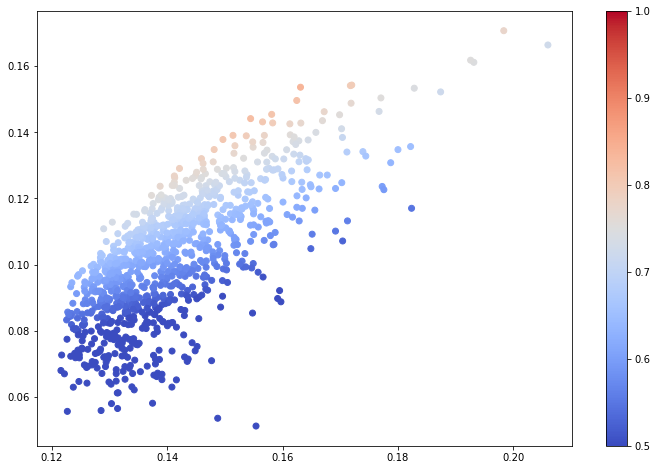

In [128]:
plt.figure(figsize=(12,8))
plt.scatter(y=return_risk["Return"],x=return_risk["Risk"],c=return_risk["SharpRatio"],cmap="coolwarm",vmin=0.5,vmax=1)
plt.colorbar()
plt.show()

Search for the __Max Sharpe Ratio Portfolio__ (from the set of 10,000 random portfolios) and determine __risk, return and Sharpe Ratio__ of the Max Sharpe Ratio Portfolio!

In [110]:
return_risk["SharpRatio"].idxmax()

357

In [113]:
return_risk.loc[return_risk["SharpRatio"].idxmax()]

Return        0.153617
Risk          0.163089
SharpRatio    0.837684
Name: 357, dtype: float64

Determine the __weights of the constituents__ in the Max Sharpe Ratio Portfolio and, if your computing power allows for this, __increase__ the __number of random portfolios__. Which stocks do you think have an __actual weight of 0__ in the "real" Max Sharpe Ratio Portfolio that can be derived with Optimization Algorithms? Can you identify a __highly concentrated position__ in one Stock?  

In [115]:
weights.loc[return_risk["SharpRatio"].idxmax()]

AXP     0.063848
FB      0.318752
INTC    0.225493
MCD     0.335008
PG      0.015671
WMT     0.041230
Name: 357, dtype: float64

------------------------

# Well Done!

-------------------

# Hints (Spoiler!)

148. agg() method, std

`df.agg`(function_list) to return the summary of the df

The df looks like below:
```
        0
func1   24
func2   23.1 
...
func100 21
```

150. pass DataFrame ret to ann_risk_return()

152. Create 10,000 * 6 random floats in total, reshape() method

use np.`randam.random.reshape(m,n)` to get random weights

df=pd.DataFrame(array)

df.`columns`=`column_list` to define the column name 

159. plt.scatter(c=df[col1])

`plt.colorbar()` to show the colorbar

160. idxmax() method

df.`idxmax`("col_name")